In [ ]:
%matplotlib inline

In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


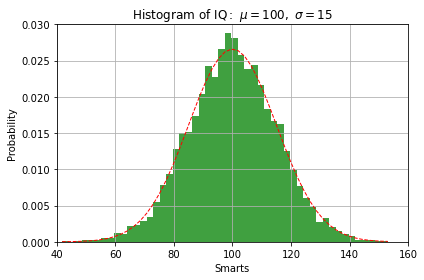

In [1]:
# %load http://matplotlib.org/1.2.1/mpl_examples/pylab_examples/histogram_demo.py
#!/usr/bin/env python
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import norm

mu, sigma = 100, 15
x = mu + sigma*np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, facecolor='green', alpha=0.75,density=True)

# add a 'best fit' line
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()


$\lambda$ is the symbol of wavelength


In [16]:
import linetools

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt

In [3]:
plt.xkcd()

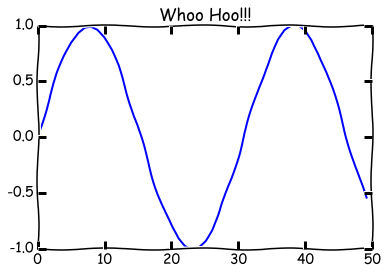

In [4]:
plt.plot(sin(linspace(0, 10)))
plt.title('Whoo Hoo!!!')

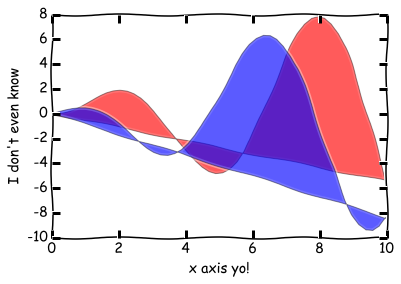

In [5]:

x = np.linspace(0, 10)
y1 = x * np.sin(x)
y2 = x * np.cos(x)

plt.fill(x, y1, 'red', alpha=0.4)
plt.fill(x, y2, 'blue', alpha=0.4)
plt.xlabel('x axis yo!')
plt.ylabel("I don't even know")

In [6]:
from bokeh.plotting import figure, output_notebook, show, vplot

In [7]:
output_notebook()

Loading BokehJS ...

In [8]:
from numpy import cos,linspace

In [9]:
x=linspace(-6,6,100)

In [11]:
y=cos(x)

In [12]:
p = figure(width=500, height=500)

In [13]:
p.circle(x, y, size=7, color="firebrick", alpha=0.5)

In [14]:
show(p)

In [16]:
from bokeh.sampledata.autompg import autompg
from numpy import array

grouped = autompg.groupby("yr")
mpg = grouped["mpg"]
avg = mpg.mean()
std = mpg.std()
years = array(list(grouped.groups.keys()))
american = autompg[autompg["origin"]==1]
japanese = autompg[autompg["origin"]==3]

In [17]:
p = figure()

p.quad(left=years-0.4, right=years+0.4, bottom=avg-std, top=avg+std, fill_alpha=0.4)

p.circle(x=japanese["yr"], y=japanese["mpg"], size=8,
         alpha=0.4, line_color="red", fill_color=None, line_width=2)

p.triangle(x=american["yr"], y=american["mpg"], size=8, 
           alpha=0.4, line_color="blue", fill_color=None, line_width=2)

show(p)

In [27]:
from bokeh.plotting import figure, output_notebook, show, vplot
from bokeh.sampledata.autompg import autompg
from numpy import array
from bokeh.models import ColumnDataSource
from bokeh.plotting import gridplot

source = ColumnDataSource(autompg.to_dict("list"))
source.add(autompg["yr"], name="yr")

plot_config = dict(plot_width=300, plot_height=300, tools="pan,wheel_zoom,box_zoom,box_select,lasso_select")

p1 = figure(plot_config, title="MPG by Year")
p1.circle("yr", "mpg", color="blue", source=source)

p2 = figure(plot_config, title="HP vs. Displacement")
p2.circle("hp", "displ", color="green", source=source)

p3 = figure(plot_config, title="MPG vs. Displacement")
p3.circle("mpg", "displ", size="cyl", line_color="red", fill_color=None, source=source)

p = gridplot([[ p1, p2, p3]])

show(p)

TypeError: figure() takes exactly 0 arguments (2 given)

In [1]:
import numpy as np
from lmfit import Model


def decay(t, tau, N):
   return N*np.exp(-t/tau)


decay_model = Model(decay)
print(f'independent variables: {decay_model.independent_vars}')


independent variables: ['t']


In [2]:
from lmfit.models import ExpressionModel

mod = ExpressionModel('off + amp * exp(-x/x0) * sin(x*phase)')

In [8]:
from lmfit.models import LinearModel, StepModel

In [10]:
# <examples/doc_builtinmodels_stepmodel.py>
import matplotlib.pyplot as plt
import numpy as np

from lmfit.models import LinearModel, StepModel

x = np.linspace(0, 10, 201)
y = np.ones_like(x)
y[:48] = 0.0
y[48:77] = np.arange(77-48)/(77.0-48)
np.random.seed(0)
y = 110.2 * (y + 9e-3*np.random.randn(x.size)) + 12.0 + 2.22*x

step_mod = StepModel(form='erf', prefix='step_')
line_mod = LinearModel(prefix='line_')

pars = line_mod.make_params(intercept=y.min(), slope=0)

In [12]:
par1=step_mod.guess(y, x=x, center=2.5)

In [14]:
pars+par1

name,value,initial value,min,max,vary
line_slope,0.00000000,None,-inf,inf,True
line_intercept,11.5857358,None,-inf,inf,True
step_amplitude,134.737762,None,-inf,inf,True
step_center,2.50000000,None,-inf,inf,True
step_sigma,1.42857143,None,0.00000000,inf,True


In [17]:
# <examples/doc_builtinmodels_nistgauss.py>
import matplotlib.pyplot as plt
import numpy as np

from lmfit.models import ExponentialModel, GaussianModel

dat = np.loadtxt('NIST_Gauss2.dat')
x = dat[:, 1]
y = dat[:, 0]

exp_mod = ExponentialModel(prefix='exp_')
pars = exp_mod.guess(y, x=x)

gauss1 = GaussianModel(prefix='g1_')

In [22]:
import matplotlib.pyplot as plt
import numpy as np

from lmfit import Minimizer, Parameters, report_fit
from lmfit.lineshapes import gaussian, lorentzian


def residual(pars, x, data):
    model = (gaussian(x, pars['amp_g'], pars['cen_g'], pars['wid_g']) +
             lorentzian(x, pars['amp_l'], pars['cen_l'], pars['wid_l']))
    return model - data

In [23]:
np.random.seed(0)
x = np.linspace(0, 20.0, 601)

data = (gaussian(x, 21, 6.1, 1.2) + lorentzian(x, 10, 9.6, 1.3) +
        np.random.normal(scale=0.1, size=x.size))

In [28]:
pfit

name,value,initial value,min,max,vary,expression
amp_g,10.0000000,10,-inf,inf,True,
amp_l,10.0000000,10,-inf,inf,True,
cen_g,5.00000000,5,-inf,inf,True,
peak_split,2.50000000,2.5,0.00000000,5.00000000,True,
cen_l,7.50000000,None,-inf,inf,False,peak_split+cen_g
wid_g,1.00000000,1,-inf,inf,True,
wid_l,1.00000000,None,-inf,inf,False,wid_g


In [27]:
pfit = Parameters()
pfit.add(name='amp_g', value=10)
pfit.add(name='amp_l', value=10)
pfit.add(name='cen_g', value=5)
pfit.add(name='peak_split', value=2.5, min=0, max=5, vary=True)
pfit.add(name='cen_l', expr='peak_split+cen_g')
pfit.add(name='wid_g', value=1)
pfit.add(name='wid_l', expr='wid_g')

mini = Minimizer(residual, pfit, fcn_args=(x, data))
out = mini.leastsq()
best_fit = data + out.residual

In [34]:
# <examples/doc_builtinmodels_nistgauss.py>
import matplotlib.pyplot as plt
import numpy as np

from lmfit.models import ExponentialModel, GaussianModel

dat = np.loadtxt('NIST_Gauss2.dat')
x = dat[:, 1]
y = dat[:, 0]

exp_mod = ExponentialModel(prefix='exp_')
pars = exp_mod.guess(y, x=x)

gauss1 = GaussianModel(prefix='g1_')
pars.update(gauss1.make_params())

pars['g1_center'].set(value=105, min=75, max=125)
pars['g1_sigma'].set(value=15, min=3)
pars['g1_amplitude'].set(value=2000, min=10)

gauss2 = GaussianModel(prefix='g2_')
pars.update(gauss2.make_params())

pars['g2_center'].set(value=155, min=125, max=175)
pars['g2_sigma'].set(value=15, min=3)
pars['g2_amplitude'].set(value=2000, min=10)

mod = gauss1 + gauss2 + exp_mod

init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

In [40]:
from astropy.table import Table
dat = Table([[1, 2], [3, 4]], names=('a', 'b'))

In [52]:
a=np.arange(1,10)
b=np.arange(20,30)
t=[a,b]

In [54]:
np.append(a,b)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29])

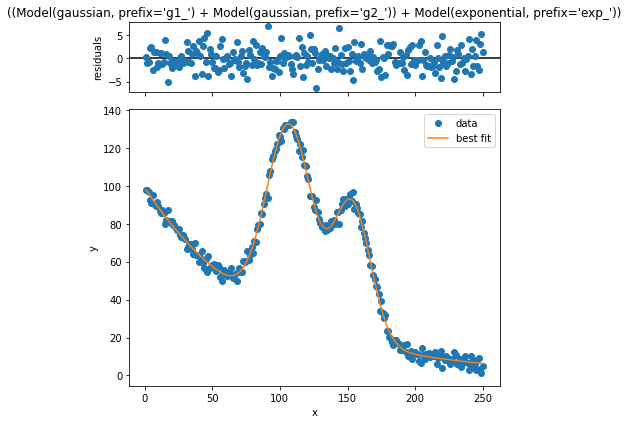

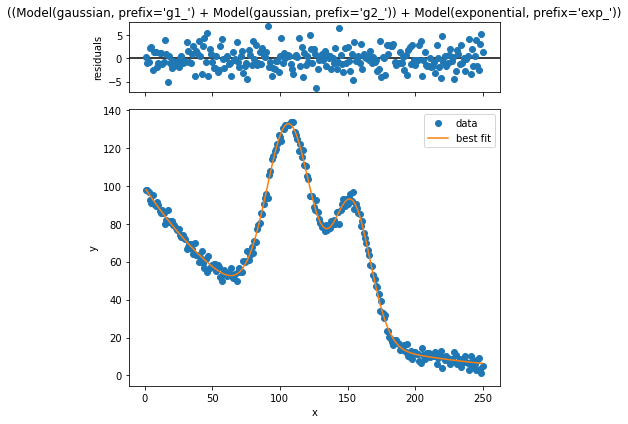

In [39]:
out.plot()